In [111]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Aplicação do algoritmo

# Antes de começarmos

Antes de darmos início ao algoritmo precisamos considerar o que queremos buscar.

No nosso exemplo iremos considerar o vetor $v$ tal que$ v = [ 66, 57, 67, 68 ]$. Agora vamos assumir 
queremos encontrar o valor 67 que entre os indíces 0 - 3 está na posição 2.

  A parti de agora vamos considerar os indíces do vetor e não mais os valores em si. Transformando os indíces em binário teremos um vetor $v'$ tal que $v' = [ 00, 01, 10, 11 ]$. E queremos portanto o indíce 10 (2). 
  
Tendo isso em mente devemos desenvolver uma função $f$ que irá "marcar" o indíce que nós estamos buscando retornando o 1 se o valor do indíce corresponde ao valor buscado e 0 caso contrário. Portanto a função terá o seguinte comportamento:

**Função:**

<p>$f(00) \rightarrow 0$    |   $f(10)  \rightarrow 1$ </p> 
<p> $f(01)  \rightarrow 0$  |   $f(11)  \rightarrow 0$</p>

**Assim ao implementarmos teremos o seguinte comportamento:**

<p>$|00, 0 \oplus f(00)\rangle$   $\rightarrow$  $|00,0\rangle$ |  
    $|01, 0 \oplus f(10)\rangle$  $\rightarrow$   $|01, 0\rangle$</p> 
<p>$|10, 0 \oplus f(10)\rangle$   $\rightarrow$   $|10,1\rangle$ |  
    $|11, 0 \oplus f(11)\rangle$  $\rightarrow$   $|11, 0\rangle$</p> 

*Obs.: $\oplus$ é a soma modulo 2.*

Dessa forma quando a função retornar 1 o último qubit mudara de 0 para 1. Um outra foram de implementarmos isso é cosiderando o último qubit como $\frac{|0\rangle - |1\rangle}{\sqrt{2}}$ e assim quando a função retornar um o sinal será mudado, isso pode ser representado da seguinte forma:
$$                                                                 O
|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)  \rightarrow (-1)^{f(x)}|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)  
$$



## Implementando a função (Oracle)

A função pode ser implementada com um portão Not e Toffoli como mostrado abaixo:



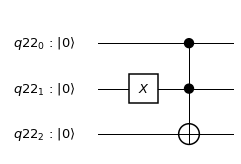

In [112]:
qub = QuantumRegister(3)
function = QuantumCircuit(qub)

#--- Função ---
function.x(qub[1])
function.ccx(qub[0], qub[1], qub[2])

function.draw()



# Implementando o Algoritmo de Grover

Agora que temos todas informações necessárias podemos de fato parti para implementação do algoritmo <br> que pode ser separado nós seguintes passos:


## Passo 1

  Nossa aplicação utilizará um vetor com 4 indices ou seja $N = 2^2$ 
  o que significa 2 qubits. Portanto o algoritmo inicial com $|0\rangle^2$
  e um qubit auxiliar para aplicação da nossa função (Oracle).
  Como o mostrado abaixo:

In [113]:
qr = QuantumRegister(3)
cr = ClassicalRegister(3)
grover = QuantumCircuit(qr, cr)

## Passo 2

Nós utilizamos o Hadamard para computar as superposições.

$|\psi\rangle = \frac{1}{\sqrt{N}} \sum_{x=0}^{N-1}|x\rangle \Big(\frac{|0\rangle - |1\rangle}{\sqrt{2}} \Big)$

In [114]:
#-- indíces --
grover.h(qr[0])
grover.h(qr[1])

#---qubit auxiliar ----
grover.x(qr[2])
grover.h(qr[2])


## Passo 3

O passo três pode ser quebrado em 4 subpassos <br>
e é onde o algoritmo de fato começa <br>

1) Aplicar o oracle *O* <br>
2) Aplicar a transformação de $H^n$ de Hadamard <br>
3) Aplicar a mudança condicional de fase <br>
para todas as bases computacionais execeto para $|0\rangle$ recebendo a fase de -1 <br>
$|x\rangle \rightarrow -(-1)^{\delta_x0}|x\rangle$ <br>
4) Aplicar a transformação de $H^n$ de Hadamard novamente<br>

## Aplicando do nosso oracle

Como vimos anteriormente nós precisamos criar um circuito que implementasse<br>
nossa função (Oracle) e dessa forma sermos capazes de "marcar" o indíce que buscamos<br>
que nesse caso é 2 ou 10.<br>

**Subpasso 1**



In [115]:
#--- Função ---
grover.x(qr[1])
grover.ccx(qr[0], qr[1], qr[2])



Agora aplicaremos a transformação de Hadamard 

**Subpasso 2**



In [116]:
grover.h(qr[0])
grover.h(qr[1])

Realizando o próximo passo realizaremos a mudança condicional<br>
de fase para cada base computacional onde $|0\rangle$.<br>

**Subpasso 3**


In [117]:

grover.x(qr[0])
grover.x(qr[1])
grover.h(qr[1])

grover.cx(qr[0], qr[1])

grover.h(qr[1])
grover.x(qr[0])
grover.x(qr[1])




Agora aplicaremos a transformação de Hadamard novamente

**Subpasso 4**


In [118]:
grover.h(qr[0])
grover.h(qr[1])
grover.h(qr[2])

## Passo 3

Como foram necessárias apenas 1 interação podemos vamos fazer a medição e o valor <br>
obtido deve ser o indíce que nós buscamos que nesse caso é 10 (2).

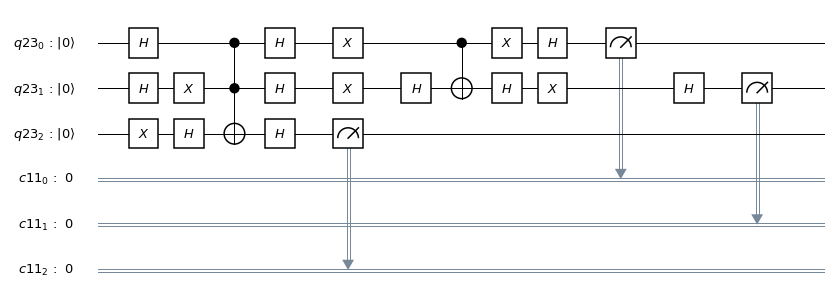

In [119]:
grover.measure(qr, cr)
grover.draw()

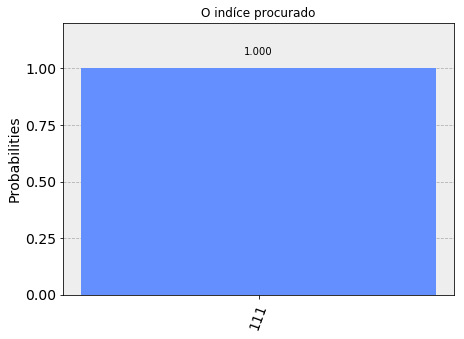

In [121]:
# Select the QasmSimulator from the Aer provider
simulator = Aer.get_backend('qasm_simulator')

# Execute and get counts
result = execute(grover, simulator).result()
counts = result.get_counts(grover)
plot_histogram(counts, title='O indíce procurado')